Import important packages and libraries

In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
%matplotlib inline

connect colap with my drive

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read iris data from drive

In [82]:
data = pd.read_csv('/content/drive/MyDrive/spark/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
data.shape

(150, 6)

Handle columns names

In [84]:
featur_names = ['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


data.columns = featur_names

featur_names

['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Drop 'id' column

In [85]:
data = data.drop(['id'], axis=1)

In [86]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Check null values

In [87]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [88]:
target= ['species']

Drop target from featurs

In [89]:
X = data.drop(['species'], axis=1)

y = data['species']

Split data to train and test

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [91]:
X_train.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

Create decision tree model

In [92]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Calculate model accuracy for train and test data

In [93]:
Y_pred_train=clf.predict(X_train)

print(Y_pred_train)

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iri

In [94]:
from sklearn.metrics import accuracy_score

print('Model accuracy score for training: {0:0.4f}'. format(accuracy_score(y_train , Y_pred_train)))

Model accuracy score for training: 0.9667


In [95]:
Y_pred_test=clf.predict(X_test)

print(Y_pred_test)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor']


In [99]:
print('Model accuracy score for testing: {0:0.4f}'. format(accuracy_score(y_test , Y_pred_test)))

Model accuracy score for testing: 0.9667


Create confusion matrix

In [96]:
from sklearn.metrics import confusion_matrix 
Con_matrix=np.array(confusion_matrix(y_test,Y_pred_test))
Con_matrix

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  9]])

Predict class of new data

In [100]:
X=[[ 6 , 3.2 , 2.5 , 1.9 ]]

Y_pred=clf.predict(X)

print(Y_pred)

['Iris-versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Visualize tree

[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.125, 0.125, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

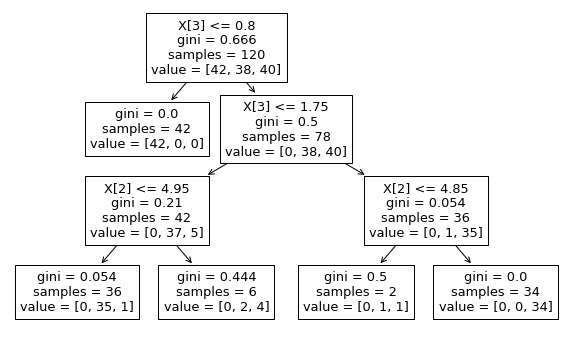

In [98]:
plt.figure(figsize=(10,6))
tree.plot_tree(clf.fit(X_train, y_train))